In [58]:
from Params import *
from numpy import *
from PlotFuncs import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numba import jit
from numpy import random


In [59]:
ngen = 100000
costh = 2*random.uniform(size=ngen)-1
th = arccos(costh)
cos2th = cos(2*th)


costh_av_Z = lambda lat : (1/8)*(3+cos(2*th)-(1+3*cos(2*th))*cos(2*lat*pi/180))
costh_av_N = lambda lat : (1/8)*(3+cos(2*lat*pi/180)+(1+3*cos(2*lat*pi/180))*cos(2*th))
costh_av_W = lambda lat : (sin(th)**2)/2
costh_av_horizontal = lambda lat : (1/8)*(5+cos(2*lat*pi/180)+(-1+3*cos(2*lat*pi/180))*cos(2*th))


nloc = 1000
lats = linspace(-90,90,nloc)
val_N = zeros(shape=nloc)
val_Z = zeros(shape=nloc)
val_W = zeros(shape=nloc)

for i in range(0,nloc):
    val_Z[i] = sort(costh_av_Z(lats[i]))[int(0.05*ngen)]
    val_N[i] = sort(costh_av_N(lats[i]))[int(0.05*ngen)]
    val_W[i] = sort(costh_av_W(lats[i]))[int(0.05*ngen)]


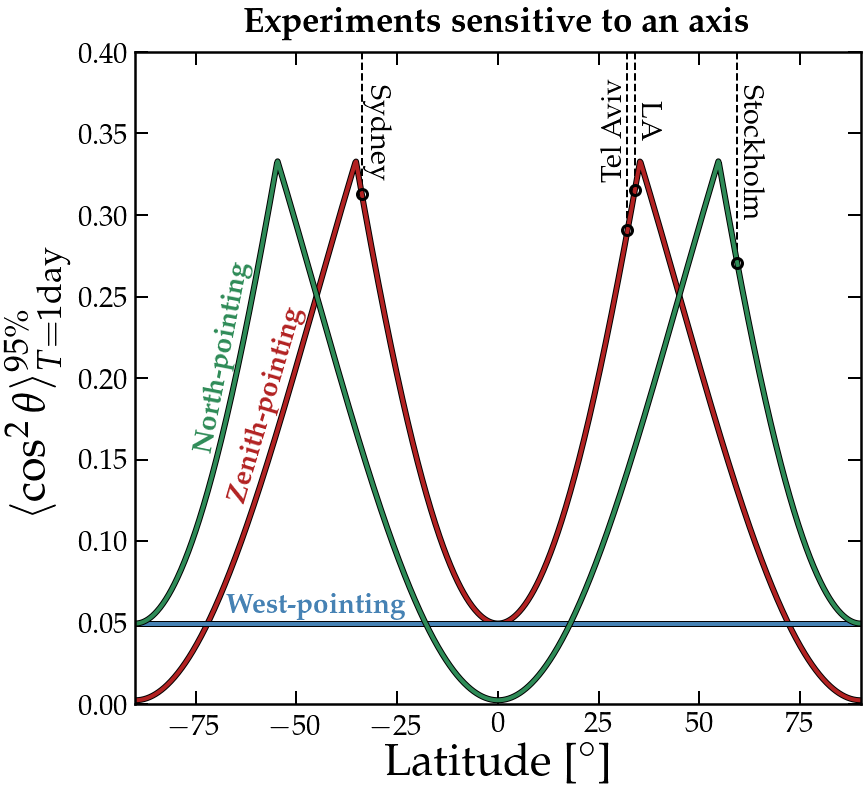

In [126]:
import matplotlib.patheffects as pe
pek=[pe.Stroke(linewidth=6, foreground='k',alpha=1), pe.Normal()]

Sydney = -33.86
LA = 34.0522
TelAviv = 32.0853
Stockholm = 59.3293

fig,ax = MySquarePlot('Latitude [$^\circ$]',r'$\langle \cos^2{\theta}\rangle^{95\%}_{T = 1{\rm day}}$',tfs=29)
plt.plot(lats,val_Z,'-',lw=4,color='firebrick',path_effects=pek)
plt.plot(lats,val_W,'-',lw=4,color='steelblue',path_effects=pek)
plt.plot(lats,val_N,'-',lw=4,color='SeaGreen',path_effects=pek)


plt.text(Sydney+4,0.38,'Sydney',va='center',rotation_mode='anchor',rotation=-90)

plt.text(LA+3,0.37,'LA',va='center',rotation_mode='anchor',rotation=-90)

plt.text(TelAviv-3,0.32,'Tel Aviv',va='center',rotation_mode='anchor',rotation=90)

plt.text(Stockholm+3,0.38,'Stockholm',va='center',rotation_mode='anchor',rotation=-90)



plt.plot([Sydney,Sydney],[0.4,val_Z[argmin(abs(Sydney-lats))]],'k--',lw=2,zorder=-10)
plt.plot(Sydney,val_Z[argmin(abs(Sydney-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([TelAviv,TelAviv],[0.4,val_Z[argmin(abs(TelAviv-lats))]],'k--',lw=2,zorder=-10)
plt.plot(TelAviv,val_Z[argmin(abs(TelAviv-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([LA,LA],[0.4,val_Z[argmin(abs(LA-lats))]],'k--',lw=2,zorder=-10)
plt.plot(LA,val_Z[argmin(abs(LA-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([Stockholm,Stockholm],[0.4,val_N[argmin(abs(Stockholm-lats))]],'k--',lw=2,zorder=-10)
plt.plot(Stockholm,val_N[argmin(abs(Stockholm-lats))],'o',color='k',markersize=10,mfc='none',mew=3)


plt.text(lats[150]*(1+0.08),val_Z[150]*(1+0.2),r'{\bf Zenith-pointing}',color='firebrick',rotation=73.5,fontsize=28)
plt.text(lats[125],val_W[120]*(1+0.135),r'{\bf West-pointing}',color='steelblue',rotation=0,fontsize=28)
plt.text(lats[100]*(1+0.06),val_N[100]*(1+0.2),r'{\bf North-pointing}',color='SeaGreen',rotation=79,fontsize=28)

plt.gcf().text(0.0,0.5,'w',color='w',zorder=-1000)
plt.xlim([-90,90])
plt.ylim([0,0.4])
plt.title(r'{\bf Experiments sensitive to an axis}',fontsize=35,pad=20)

#ax.set_xticks(arange(-90,90+20,20))

MySaveFig(fig,'LocationDependence')

In [75]:
costh_av_NW = lambda lat : (1/8)*(5+cos(2*lat*pi/180)+(-1+3*cos(2*lat*pi/180))*cos(2*th))
costh_av_ZW = lambda lat : (1/8)*(5-cos(2*lat*pi/180)-(1+3*cos(2*lat*pi/180))*cos(2*th))
costh_av_ZN = lambda lat : (1/4)*(3+cos(2*th))


nloc = 1000
lats = linspace(-90,90,nloc)
val_NW = zeros(shape=nloc)
val_ZW = zeros(shape=nloc)
val_ZN = zeros(shape=nloc)

for i in range(0,nloc):
    val_NW[i] = sort(costh_av_NW(lats[i]))[int(0.05*ngen)]
    val_ZW[i] = sort(costh_av_ZW(lats[i]))[int(0.05*ngen)]
    val_ZN[i] = sort(costh_av_ZN(lats[i]))[int(0.05*ngen)]


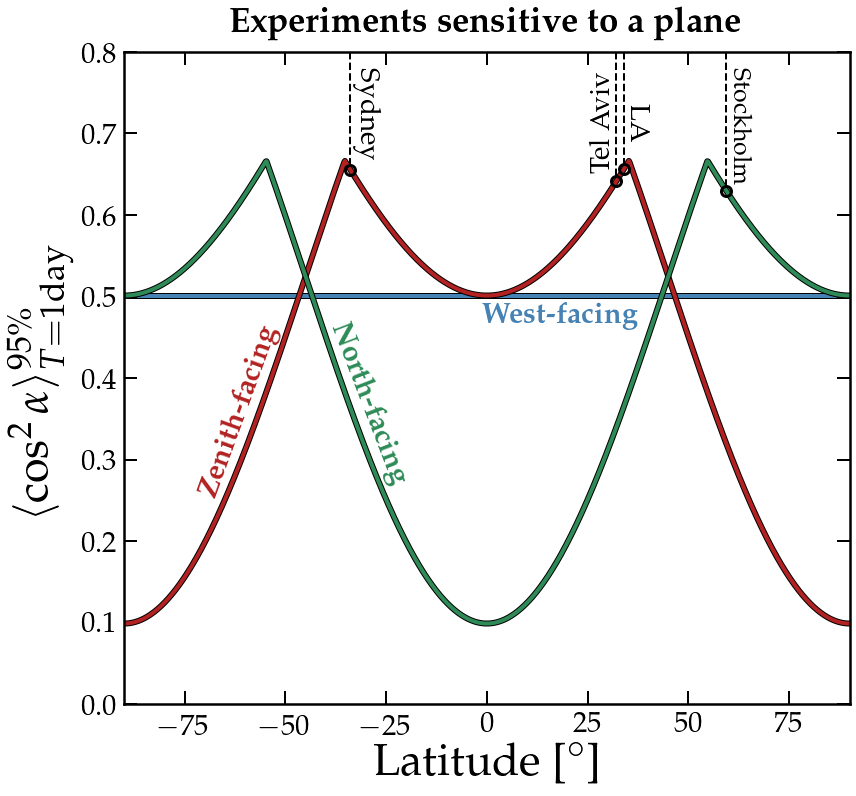

In [128]:
ymax = 0.8

fig,ax = MySquarePlot('Latitude [$^\circ$]',r'$\langle \cos^2{\alpha}\rangle^{95\%}_{T = 1{\rm day}}$',tfs=29)
plt.plot(lats,val_NW,'-',lw=4,color='firebrick',path_effects=pek)
plt.plot(lats,val_ZN,'-',lw=4,color='steelblue',path_effects=pek,zorder=-1)
plt.plot(lats,val_ZW,'-',lw=4,color='seagreen',path_effects=pek)


plt.text(Sydney+4,ymax-0.02,'Sydney',va='center',rotation_mode='anchor',rotation=-90,fontsize=28)
plt.text(LA+3,ymax*(1-0.08),'LA',va='center',rotation_mode='anchor',rotation=-90,fontsize=28)
plt.text(TelAviv-3,ymax-0.15,'Tel Aviv',va='center',rotation_mode='anchor',rotation=90,fontsize=28)
plt.text(Stockholm+3,ymax-0.02,'Stockholm',va='center',rotation_mode='anchor',rotation=-90,fontsize=25)



plt.plot([Sydney,Sydney],[ymax,val_NW[argmin(abs(Sydney-lats))]],'k--',lw=2,zorder=-10)
plt.plot(Sydney,val_NW[argmin(abs(Sydney-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([TelAviv,TelAviv],[ymax,val_NW[argmin(abs(TelAviv-lats))]],'k--',lw=2,zorder=-10)
plt.plot(TelAviv,val_NW[argmin(abs(TelAviv-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([LA,LA],[ymax,val_NW[argmin(abs(LA-lats))]],'k--',lw=2,zorder=-10)
plt.plot(LA,val_NW[argmin(abs(LA-lats))],'o',color='k',markersize=10,mfc='none',mew=3)

plt.plot([Stockholm,Stockholm],[ymax,val_ZW[argmin(abs(Stockholm-lats))]],'k--',lw=2,zorder=-10)
plt.plot(Stockholm,val_ZW[argmin(abs(Stockholm-lats))],'o',color='k',markersize=10,mfc='none',mew=3)


plt.text(lats[120]*(1+0.06),val_NW[120]*(1+0.2),r'{\bf Zenith-facing}',color='firebrick',rotation=70)
plt.text(lats[600],val_ZN[600]-0.025,r'{\bf West-facing}',color='steelblue',rotation=0,ha='center',va='center')
plt.text(lats[350]-13,val_ZW[350],r'{\bf North-facing}',color='seagreen',rotation=-69)

plt.gcf().text(0.0,0.5,'w',color='w',zorder=-1000)
#plt.axhline(1/3,color='k',lw=2.5,alpha=0.4)
plt.xlim([-90,90])
plt.ylim([0,ymax])
plt.title(r'{\bf Experiments sensitive to a plane}',fontsize=35,pad=20)

MySaveFig(fig,'LocationDependence_2D')